<a href="https://colab.research.google.com/github/NikitaLodha25/BrestCancerClassification/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np  #for arrays
import pandas as pd   #create dataframe
import matplotlib.pyplot as plt   #for plotting graphs-visualize
import sklearn.datasets   #has basic datasets for performing classifications
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split    #for splitting data

# **Data Collection & Processing**

In [10]:
#loading brest cancer dataset from sklearn datasets and storing
breast_cancer_data=sklearn.datasets.load_breast_cancer()

In [11]:
print(breast_cancer_data)   #the data is in form of a dictionary
#data and target are the values of dictionary
# target value 1 represents beling cancer
# target value 0 represents malignant cancer
#giving the particular features of 'data'dictionary we will find which type of cancer it is.

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [17]:
#load data to a dataframe
data_frame=pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)

In [19]:
#adding target column to the dataframe
data_frame['label']=breast_cancer_data.target
#print last 5 rows
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [20]:
#get information about the dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
#number of rows and columns 
data_frame.shape

(569, 31)

In [26]:
#check distribution of target variable 
data_frame['label'].value_counts() 

1    357
0    212
Name: label, dtype: int64

1-> Benign

0-> Malignant


# **Seperate features and targets**

In [27]:
#dropping the label column
X=data_frame.drop(columns='label',axis=1)
#storing the label column in other variable
Y=data_frame['label']

In [29]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [30]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [31]:
X=np.array(X)
Y=np.array(Y)

#**GridSearchCv** 

GridSearchCv used for determining best parameters for model

In [34]:
#load SVC model
model=SVC()

In [35]:
#hyper parameters
#for different combinations of kernel and C we will train the model and find accuracy, after trying each combination we get the most optimal solution
#parameter is a dictionary of key kernel and value C
# less C value determines less non-classification and clear cut hyperplane, greater the C value determines more discrepancy
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

In [36]:
#grid search
#CV is cross validation- split data into 5 folds and take mean of the 5 accuracies
classifier=GridSearchCV(model,parameters,cv=5)

In [37]:
#as we using CV then we dont need to split the train and test data here
#after finding optimal solution we will split our data
#fitting the data to model and different combinations are tried out here
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [38]:
#all different combination results are shown
classifier.cv_results_

{'mean_fit_time': array([1.40977340e+00, 3.80024910e-03, 6.85024261e-03, 1.63736343e-02,
        2.82943830e+00, 4.14538383e-03, 5.08747101e-03, 1.46068573e-02,
        4.64204941e+00, 4.38327789e-03, 5.59902191e-03, 1.50438786e-02,
        8.87183275e+00, 4.63080406e-03, 5.03888130e-03, 1.47402287e-02]),
 'std_fit_time': array([5.51623135e-01, 1.37987199e-04, 2.14044682e-03, 9.84541224e-04,
        5.70103706e-01, 4.15661771e-04, 2.20353390e-04, 6.10589350e-04,
        9.30239968e-01, 1.51993847e-04, 4.07106576e-04, 5.87809731e-04,
        3.24231027e+00, 8.44590203e-05, 2.58733160e-04, 5.74058371e-04]),
 'mean_score_time': array([0.00099273, 0.00104675, 0.00196414, 0.00394535, 0.00092072,
        0.00107713, 0.00168495, 0.00361786, 0.00092134, 0.00104113,
        0.00167232, 0.00350904, 0.00362349, 0.00103693, 0.00160513,
        0.00366731]),
 'std_score_time': array([7.96321481e-05, 3.21653438e-05, 3.21963613e-05, 1.14730429e-04,
        3.11515201e-05, 4.06088925e-05, 5.33442910e-

In [40]:
#print best parameters
best_parameters=classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [44]:
#determine highest accuracy
highest_accuracy=classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [45]:
#loading best result to pandas dataframe
result=pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.409773,0.551623,0.000993,0.000080,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003800,0.000138,0.001047,0.000032,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.006850,0.002140,0.001964,0.000032,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.016374,0.000985,0.003945,0.000115,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.829438,0.570104,0.000921,0.000031,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [47]:
#shrinking dataframe with some useful columns
grid_search_result=result[['param_C','param_kernel','mean_test_score']]
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


**The highest accuracy is: 95.25**


**Best parameters= ['C':10 , 'kernel':'linear']**

#**RandomizedSearchCv**

RandomizedSearchCV randomly takes certain cominations of CV so that less memory is used by systems.
Here, the accuracy may vary from time to time.

In [48]:
#loading the SVC model
model=SVC()

In [49]:
#hyper parameters
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

In [51]:
#randomized search
classifier=RandomizedSearchCV(model,parameters,cv=5)

In [52]:
#fitting the data
classifier.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [53]:
classifier.cv_results_

{'mean_fit_time': array([1.05147362e-02, 1.18749142e-02, 6.10370636e-03, 4.26816940e-03,
        1.50704384e-02, 5.71985245e-03, 1.61382198e-02, 4.46634293e-03,
        5.52819719e+00, 3.13534102e+00]),
 'std_fit_time': array([3.43025752e-03, 6.49641106e-03, 1.31882543e-03, 1.07262572e-03,
        1.15816601e-03, 1.62005268e-04, 1.99522654e-03, 2.08166996e-04,
        1.25189752e+00, 7.72093349e-01]),
 'mean_score_time': array([0.00278425, 0.00202794, 0.00138779, 0.00098529, 0.00401998,
        0.00180674, 0.00385542, 0.00092926, 0.00125284, 0.00091934]),
 'std_score_time': array([4.44669506e-05, 1.57051688e-04, 3.72507874e-04, 1.19980757e-04,
        9.36674571e-04, 2.66274169e-05, 7.78638073e-04, 5.01556082e-05,
        2.59728582e-04, 1.90155819e-05]),
 'param_kernel': masked_array(data=['rbf', 'poly', 'poly', 'poly', 'sigmoid', 'rbf',
                    'sigmoid', 'poly', 'linear', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
             

In [55]:
#determine best parameters
best_parameters=classifier.best_params_
best_parameters

{'kernel': 'linear', 'C': 10}

In [56]:
#determinong highest accuracy
highest_accuracy=classifier.best_score_
highest_accuracy

0.9525694767893185

In [57]:
#loading results to pandas dataframe
result=pd.DataFrame(classifier.cv_results_)

In [58]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010515,0.003430,0.002784,0.000044,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.877193,0.921053,0.912281,0.956140,0.946903,0.922714,0.027879,4
1,0.011875,0.006496,0.002028,0.000157,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,8
2,0.006104,0.001319,0.001388,0.000373,poly,10,"{'kernel': 'poly', 'C': 10}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,5
3,0.004268,0.001073,0.000985,0.000120,poly,5,"{'kernel': 'poly', 'C': 5}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,3
4,0.015070,0.001158,0.004020,0.000937,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.473684,0.403509,0.421053,0.342105,0.353982,0.398867,0.047640,10


In [60]:
randomized_search_result=result[['param_C','param_kernel','mean_test_score']]
randomized_search_result

,param_C,param_kernel,mean_test_score
0,10,rbf,0.922714
1,1,poly,0.908663
2,10,poly,0.920975
3,5,poly,0.922729
4,20,sigmoid,0.398867
5,1,rbf,0.912172
6,10,sigmoid,0.402391
7,20,poly,0.919221
8,10,linear,0.952569
9,5,linear,0.950815


**The highest accuracy is: 95.25**



**Best parameters= ['C':10 , 'kernel':'linear']**

# **Splitting Data into Training data & Testing Data**

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,
                                               random_state=2)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


# Standarize the data

In [76]:
from sklearn.preprocessing import StandardScaler

In [81]:
# loading standard scalar function
scaler=StandardScaler()
# fitting the data, transforming the data and then storing the data in other variable
#fitting the data should be done on Training data and not on Test data
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

# *Building Neural Network*

neural Network: Input--> Hidden--> Output

In [65]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 

In [92]:
# setting up the layers of Neural Network
# Flatten: converts matrices to single dimensional arrays
# Hidden layer can contain as many layers as many needed. More than 1 hidden layer can be added if needed.
# Output layer should match with the number of labels
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(30,)), #input layer
     keras.layers.Dense(25,activation='relu'),  #hidden layer
     keras.layers.Dense(2,activation='sigmoid')  # output layer
])

In [93]:
# compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
#training the neural network Model
#validation split= fine tunes model after each epoch 
#epochs=how many times model goes through the data
history= model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 1.3131 - accuracy: 0.3888 - val_loss: 1.2300 - val_accuracy: 0.3696
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.9604 - accuracy: 0.4010 - val_loss: 0.8563 - val_accuracy: 0.4130
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.4597 - val_loss: 0.5708 - val_accuracy: 0.5217
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7384 - val_loss: 0.3742 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.9315 - val_loss: 0.2606 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.9535 - val_loss: 0.2003 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.9560 - val_loss: 0.1684 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

# **Visualizing Accuracy and Loss**

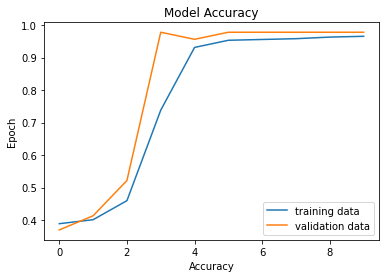

In [95]:
#visualizing Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

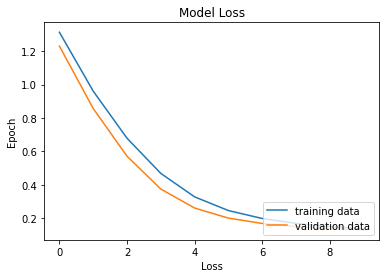

In [96]:
#visualizing Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

**Accuracy of the model on Test Data**

In [97]:
# evalute function compares the Training Data with real value and gives loss and accuracy
loss,accuracy=model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.1363 - accuracy: 0.9649


In [98]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [99]:
#creating Prediction model 
Y_pred=model.predict(X_test_std)
print(Y_pred.shape)
#it predicts the value for X_test_std[0]
print(Y_pred[0])
#

4/4 [==============================] - 1s 5ms/step
(114, 2)
[0.08379416 0.15452811]


In [101]:
X_test_std

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]])

In [105]:
print(Y_pred)

[[8.37941617e-02 1.54528111e-01]
 [2.12359369e-01 2.69102126e-01]
 [1.57476738e-02 4.61897671e-01]
 [9.80215311e-01 1.79236631e-05]
 [2.84902036e-01 3.27280879e-01]
 [9.39990044e-01 1.47179153e-03]
 [2.41350934e-01 5.39734304e-01]
 [5.35909273e-03 2.19360620e-01]
 [3.76981720e-02 3.51036072e-01]
 [1.53598106e-02 2.94586450e-01]
 [2.35344619e-01 2.63239831e-01]
 [7.88157582e-02 4.87430662e-01]
 [4.28293683e-02 3.23143870e-01]
 [1.38752118e-01 3.94911557e-01]
 [4.31275517e-02 4.38067466e-01]
 [6.18450284e-01 1.64471269e-02]
 [1.93843115e-02 4.65152264e-01]
 [5.23236096e-02 4.77177829e-01]
 [5.39326221e-02 3.81611824e-01]
 [7.61923194e-01 3.62496660e-03]
 [1.41881369e-02 9.81456712e-02]
 [3.27690579e-02 4.30567414e-01]
 [1.41302161e-02 3.65156502e-01]
 [1.04389368e-02 3.02533656e-01]
 [8.81029665e-02 3.28679413e-01]
 [7.22994804e-01 6.20165979e-03]
 [1.28529057e-01 4.75855261e-01]
 [1.83657229e-01 2.67099887e-01]
 [6.33506477e-01 6.26019808e-03]
 [8.23770821e-01 7.71004427e-03]
 [1.432933

**model.predict() gives the prediction probablity of each class for the data point**

In [104]:
#converting prediction probablity to class labels(0 or 1)
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


# **Building the Predictive System**

In [114]:
input_data=(13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)
#change input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape numpy array as we are predictiong for 1 data point
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standarizing the input_data
input_data_std=scaler.transform(input_data_reshaped)
prediction=model.predict(input_data_std)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==0):
  print('The Tumor is Malignant!\nCheckup Recommended.')
else:
  print('The Tumor is Benign!\nNeed not to worry.')

1/1 [==============================] - 0s 20ms/step
[[0.11489825 0.39658615]]
[1]
The Tumor is Benign!
Need not to worry.
